# Step 1: Importing Necessary Libraries

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

# Step 2: Load the Data

In [25]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [26]:
# Read & Store data
train_data = pd.read_csv('/content/gdrive/MyDrive/datasets/train.csv')
test_data = pd.read_csv('/content/gdrive/MyDrive/datasets/test.csv')

# Step 3: Explore the Data

In [27]:
# Display basic info about the datasets
print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)

Train Data Shape: (1117957, 22)
Test Data Shape: (745305, 21)


In [28]:
# Display first 5 rows of train data
print("Train Data Preview:")
train_data.head()

Train Data Preview:


,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [29]:
# Display summary statistics
print("Train Data Summary Statistics:")
train_data.describe()

Train Data Summary Statistics:


,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


In [30]:
# Check for missing values
print("Train Data Missing Values:")
train_data.isna().sum()

Train Data Missing Values:


id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

# Step 4: Visualize Train Data

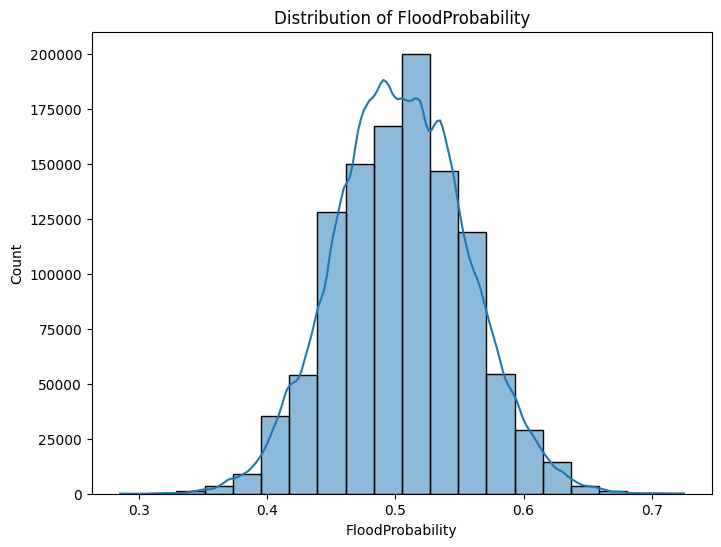

In [31]:
plt.figure(figsize=(8, 6))
sns.histplot(train_data['FloodProbability'], bins=20, kde=True)
plt.title('Distribution of FloodProbability')
plt.xlabel('FloodProbability')
plt.ylabel('Count')
plt.show()

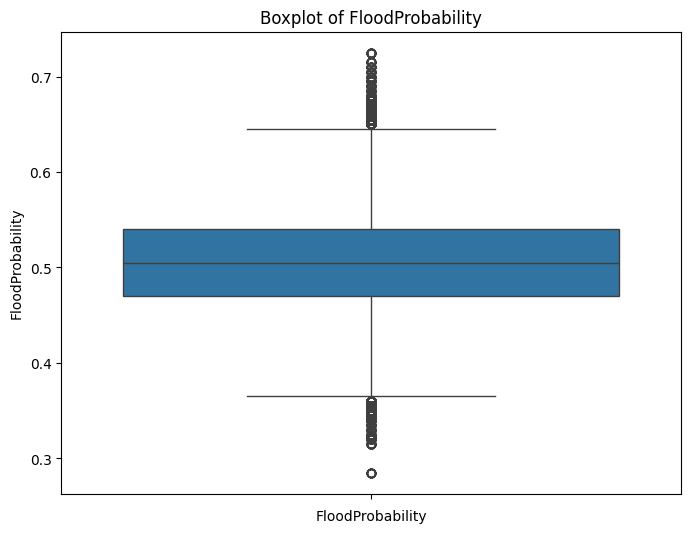

In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(train_data['FloodProbability'])
plt.title('Boxplot of FloodProbability')
plt.xlabel('FloodProbability')
plt.show()

# Step 5: Preprocess the Data

In [33]:
# Encoding categorical features and target variable
label_encoders = {}
for column in train_data.select_dtypes(include=['object']).columns:
    if column != 'FloodProbability':
        le = LabelEncoder()
        combined_data = pd.concat([train_data[column], test_data[column]], axis=0).fillna('missing')
        le.fit(combined_data)
        train_data[column] = le.transform(train_data[column].fillna('missing'))
        test_data[column] = le.transform(test_data[column].fillna('missing'))
        label_encoders[column] = le

In [34]:
# Encode the target variable
le_target = LabelEncoder()
train_data['FloodProbability'] = le_target.fit_transform(train_data['FloodProbability'])
label_encoders['FloodProbability'] = le_target

# Step 6: Build & Train Model

In [35]:
# Drop 'id' column from both training and test data
X_train = train_data.drop(columns=['FloodProbability', 'id'])
y_train = train_data['FloodProbability']
test_features = test_data.drop(columns=['id'])

In [36]:
# Initialize RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

In [37]:
# Fit the model on the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Step 7: Evaluate the Model

In [38]:
# Evaluate the model using training data
y_pred = rf_model.predict(X_train)

In [39]:
# Calculate R2 score
r2 = r2_score(y_train, y_pred)
print(f"Validation R2 Score: {r2:.4f}")

Validation R2 Score: 0.9517


# Step 8: Make Predictions

In [43]:
# Prepare the submission file
test_ids = test_data['id']
test_features = test_data.drop(columns=['id'])

In [44]:
# Make predictions on the test data
test_preds = rf_model.predict(test_features)

In [45]:
# Create a submission DataFrame
submission = pd.DataFrame({
    'id': test_data['id'],
    'FloodProbability': test_preds
})

In [46]:
# Print first five rows of submission file
print("First five rows of submission file: ")
submission.head()

First five rows of submission file: 


,id,FloodProbability
0,1117957,49.14
1,1117958,32.04
2,1117959,33.06
3,1117960,31.74
4,1117961,35.00


In [47]:
# Save the submission file
submission.to_csv('submission.csv', index=False)
print('Submission file saved!')

Submission file saved!
